In [1]:
from skfeature.function.similarity_based import fisher_score

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd


In [3]:
mat = scipy.io.loadmat("C:/Users/heera/OneDrive - Heerak/Desktop/WLDataAll.mat")

In [4]:

a=mat["data"].T
X=np.reshape(a,(-1,62,512))
y= mat["label"].T-1

In [5]:
X.shape

(360, 62, 512)

In [6]:
y.shape

(360, 1)

Text(0, 0.5, 'Amplitude')

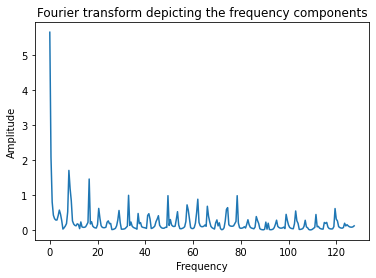

In [32]:


samplingFrequency   = 256;

 

# At what intervals time points are sampled

samplingInterval       = 1 / samplingFrequency;

# Add the sine waves

amplitude = X[0][0]


# Frequency domain representation

fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

 

tpCount     = len(amplitude)

values      = np.arange(int(tpCount/2))

timePeriod  = tpCount/samplingFrequency

frequencies = values/timePeriod

 

# Frequency domain representation

plt.title('Fourier transform depicting the frequency components')

 

plt.plot(frequencies, abs(fourierTransform))

plt.xlabel('Frequency')

plt.ylabel('Amplitude')


# Function to perform FFT on EEG Signals

In [33]:
from scipy.fft import fft, ifft , fftfreq

In [9]:

def get_fourier_transform(sampling_frequency, data_points):
    amplitude = data_points             # X[0][1]
    fourier_transform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude
    fourier_transform = fourier_transform[range(int(len(amplitude)/2))] # Exclude sampling frequency
    tpCount     = len(amplitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/sampling_frequency
    frequencies = values/timePeriod
    return fourier_transform,frequencies


 
    
    

# Get Power Features - Band Power and Relative band power for frequency 4~45 Hz

In [34]:
def get_power_features(fourier_transform):
    magnitude = abs(fourier_transform)
    m=np.square(magnitude)
    power = abs(m)
#     power_delta=power[:9].mean()
    power_theta=power[10:17].mean()
    power_alpha=power[18:25].mean()
    power_beta=power[26:61].mean()
    power_gamma=power[62:91].mean()
    total_power = power_theta + power_alpha + power_beta + power_gamma
#     relative_power_delta = power_delta/total_power
    relative_power_theta = power_theta/total_power
    relative_power_alpha = power_alpha/total_power
    relative_power_beta = power_beta/total_power
    relative_power_gamma= power_gamma/total_power
    return list((power_theta,power_alpha,power_beta,power_gamma,relative_power_theta,relative_power_alpha,relative_power_beta,relative_power_gamma))

In [35]:
data_points = X[0][1]
sampling_frequency   = 256
fourier_transform,frequencies = get_fourier_transform(sampling_frequency,data_points)
arr = get_power_features(fourier_transform)
print(arr)

[0.10654955525283656, 0.027994863245138894, 0.028261367478445005, 0.04453681309488269, 0.5138816419302006, 0.13501742223030455, 0.13630275498150857, 0.21479818085798616]


# After extracting the features the number of data points reduced from 512 to 8

In [37]:
X.shape

(360, 62, 512)

In [38]:
reduced_data_points = []
for sample in range(X.shape[0]):
    channels_features = []
    for channel in range(X.shape[1]):
        data_points = X[sample][channel]
        sampling_frequency   = 256
        fourier_transform,frequencies = get_fourier_transform(sampling_frequency,data_points)
        arr = get_power_features(fourier_transform)
        channels_features.append(arr)
    reduced_data_points.append(channels_features)
print(np.array((reduced_data_points)).shape)


(360, 62, 8)


# Split Data for Training

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
new_X = np.array((reduced_data_points))
new_X.shape


(360, 62, 8)

In [41]:
new_X = new_X.reshape(new_X.shape[0],-1)
new_X.shape


(360, 496)

In [42]:

df=pd.DataFrame(new_X)
df["labels"]= y

df.head()

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,labels
0,0.470893,0.127282,0.103117,0.072812,0.608307,0.164425,0.133208,0.094059,0.106550,0.027995,...,0.106306,0.143176,0.012645,0.065235,0.060555,0.508417,0.044903,0.231648,0.215031,0
1,0.060270,0.025298,0.075932,0.047196,0.288794,0.121221,0.363840,0.226146,0.197601,0.068702,...,0.174860,0.559286,0.161429,0.313540,0.169723,0.464532,0.134080,0.260420,0.140968,0
2,0.411585,0.076357,0.689160,0.314281,0.275975,0.051199,0.462094,0.210731,0.128580,0.057579,...,0.129618,0.032321,0.014492,0.021681,0.013243,0.395427,0.177302,0.265253,0.162018,0
3,0.041405,0.030127,0.025009,0.025875,0.338229,0.246107,0.204297,0.211366,0.209727,0.024611,...,0.202583,0.015745,0.021829,0.086657,0.051535,0.089580,0.124195,0.493022,0.293203,0
4,0.242024,0.071124,0.115868,0.059681,0.495243,0.145538,0.237096,0.122123,0.824962,0.071918,...,0.186033,0.302745,0.044107,0.399486,0.224286,0.311908,0.045442,0.411577,0.231074,0


In [43]:
df.values[:,-1][0]

0.0

In [44]:
df.to_csv("reduced_features.csv",index = False)


# Writing to CSV the reduced features

In [46]:
pd.read_csv("reduced_features.csv" )

,0,1,2,3,4,5,6,7,8,9,...,487,488,489,490,491,492,493,494,495,labels
0,0.470893,0.127282,0.103117,0.072812,0.608307,0.164425,0.133208,0.094059,0.106550,0.027995,...,0.106306,0.143176,0.012645,0.065235,0.060555,0.508417,0.044903,0.231648,0.215031,0
1,0.060270,0.025298,0.075932,0.047196,0.288794,0.121221,0.363840,0.226146,0.197601,0.068702,...,0.174860,0.559286,0.161429,0.313540,0.169723,0.464532,0.134080,0.260420,0.140968,0
2,0.411585,0.076357,0.689160,0.314281,0.275975,0.051199,0.462094,0.210731,0.128580,0.057579,...,0.129618,0.032321,0.014492,0.021681,0.013243,0.395427,0.177302,0.265253,0.162018,0
3,0.041405,0.030127,0.025009,0.025875,0.338229,0.246107,0.204297,0.211366,0.209727,0.024611,...,0.202583,0.015745,0.021829,0.086657,0.051535,0.089580,0.124195,0.493022,0.293203,0
4,0.242024,0.071124,0.115868,0.059681,0.495243,0.145538,0.237096,0.122123,0.824962,0.071918,...,0.186033,0.302745,0.044107,0.399486,0.224286,0.311908,0.045442,0.411577,0.231074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.857354,0.360168,0.310896,0.217993,0.490923,0.206233,0.178020,0.124824,0.800389,0.709219,...,0.103294,71.089575,45.938825,15.586752,12.667320,0.489320,0.316203,0.107286,0.087191,1
356,60.545124,25.323040,12.981683,8.648859,0.563217,0.235566,0.120761,0.080455,53.357058,20.373275,...,0.080192,13.970617,3.202913,2.980639,1.794054,0.636526,0.145930,0.135803,0.081740,1
357,7.014134,1.773392,1.927239,1.659795,0.566819,0.143310,0.155742,0.134130,4.547264,2.622118,...,0.072105,1.309210,0.416925,0.270623,0.232664,0.587242,0.187010,0.121387,0.104361,1
358,1.519833,0.614975,0.466911,0.294081,0.524840,0.212368,0.161237,0.101554,2.800917,0.551473,...,0.081949,2.186391,0.672013,0.609623,0.478901,0.553947,0.170262,0.154455,0.121335,1


In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(new_X, y,test_size=0.3,random_state =6)

In [48]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(252, 496)
(108, 496)
(252, 1)
(108, 1)


In [49]:
np.unique(Y_train,return_counts=True)

(array([0, 1], dtype=uint8), array([125, 127], dtype=int64))

In [50]:
np.unique(Y_test,return_counts=True)

(array([0, 1], dtype=uint8), array([55, 53], dtype=int64))

# Logistic Model from Scratch

# Weight Initialization

In [26]:

def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b

# Implement Sigmoid Function

In [27]:
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result


# Implement forward and backward propagation

In [51]:
def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Forward propagation
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Backward propagation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost

# Update Parameters

In [52]:
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

In [30]:
def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred

# Model with 5 fold cross validation

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kfold = KFold(5, True, 1)

for train_index, test_index in kfold.split(new_X):
    X_train, X_test = new_X[train_index], new_X[test_index]
    Y_train, Y_test = y[train_index], y[test_index]
    #Get number of features
    n_features = X_train.shape[1]
    print('Number of Features', n_features)
    w, b = weightInitialization(n_features)
    #Gradient Descent
    coeff, gradient, costs = model_predict(w, b, X_train, Y_train, learning_rate=0.01,no_iterations=3000)
    #Final prediction
    w = coeff["w"]
    b = coeff["b"]
#     print('Optimized weights', w)
#     print('Optimized intercept',b)
#     #
    final_train_pred = sigmoid_activation(np.dot(w,X_train.T)+b)
    final_test_pred = sigmoid_activation(np.dot(w,X_test.T)+b)
    #
    m_tr =  X_train.shape[0]
    m_ts =  X_test.shape[0]
    #
    y_tr_pred = predict(final_train_pred, m_tr)
    print('Training Accuracy',accuracy_score(y_tr_pred.T, Y_train))
    #
    y_ts_pred = predict(final_test_pred, m_ts)
    print('Test Accuracy',accuracy_score(y_ts_pred.T, Y_test)) 

C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Number of Features 496
Training Accuracy 0.8194444444444444
Test Accuracy 0.5833333333333334
Number of Features 496
Training Accuracy 0.8020833333333334
Test Accuracy 0.4861111111111111
Number of Features 496
Training Accuracy 0.8229166666666666
Test Accuracy 0.5277777777777778
Number of Features 496
Training Accuracy 0.8680555555555556
Test Accuracy 0.5555555555555556
Number of Features 496
Training Accuracy 0.8541666666666666
Test Accuracy 0.4166666666666667


In [54]:
costs

[0.6931471805599453,
 0.5609077438419493,
 0.5395705782072152,
 0.5251307067102824,
 0.5139426092438814,
 0.504683015601197,
 0.4967134184537562,
 0.48967484193559413,
 0.4833438144819298,
 0.477570928530059,
 0.4722509913844299,
 0.46730699636517686,
 0.46268082354544127,
 0.45832751076179157,
 0.4542115519317428,
 0.4503044102630744,
 0.44658279211025365,
 0.4430274155515355,
 0.439622112616856,
 0.4363531646218341,
 0.4332088051787279,
 0.430178845662294,
 0.4272543900921822,
 0.424427614905552,
 0.42169159586249194,
 0.4190401696830835,
 0.4164678218954686,
 0.41396959495181973,
 0.4115410123168286,
 0.40917801530806]

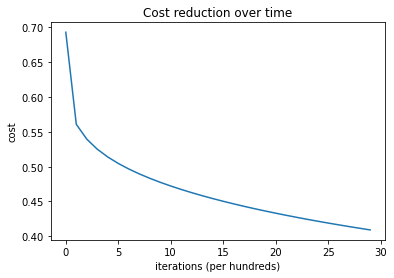

In [55]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title('Cost reduction over time')
plt.show()

# Pytorch ANN - Multilayer perceptron with Evaluation 5 fold cross validation


Code Referred from : https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/

In [59]:
!pip install torch

In [60]:
!pip install torchvision

In [61]:

# check pytorch version
import torch
print(torch.__version__)

1.9.0+cpu


In [62]:
# pytorch mlp for binary classification
from numpy import vstack
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_
from sklearn.model_selection import KFold

# # dataset definition
class CSVDataset(Dataset):
    # load the dataset
    def __init__(self, path):
        # load the csv file as a dataframe
        df = read_csv(path, header=None)
        # store the inputs and outputs
        self.X = df.values[:, :-1]
        self.y = df.values[:, -1]
        # ensure input data is floats
        self.X = self.X.astype('float32')
#        label encode target and ensure the values are floats
        self.y = LabelEncoder().fit_transform(self.y)
        self.y = self.y.astype('float32')
        self.y = self.y.reshape((len(self.y), 1))

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and test rows
  
    def get_splits(self, n_test=0.30):
    # determine sizes
        test_size = round(n_test * len(self.X))
        train_size = len(self.X) - test_size
        # calculate the split
        return random_split(self, [train_size, test_size])

# model definition
class MLP(Module):
    # define model elements
    def __init__(self, n_inputs):
        super(MLP, self).__init__()
        # input to first hidden layer
        self.hidden1 = Linear(n_inputs, 10)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        # second hidden layer
        self.hidden2 = Linear(10, 8)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        # third hidden layer and output
        self.hidden3 = Linear(8, 1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()

    # forward propagate input
    def forward(self, X):
        # input to first hidden layer
        X = self.hidden1(X)
        X = self.act1(X)
         # second hidden layer
        X = self.hidden2(X)
        X = self.act2(X)
        # third hidden layer and output
        X = self.hidden3(X)
        X = self.act3(X)
        return X

# prepare the dataset
def prepare_data(path):
    # load the dataset
    dataset = CSVDataset(path)
    # calculate split
    train, test = dataset.get_splits()
    # prepare data loaders
    train_dl = DataLoader(train, batch_size=32, shuffle=True)
    test_dl = DataLoader(test, batch_size=1024, shuffle=False)
    return train_dl, test_dl

# train the model
def train_model(train_dl, model):
    # define the optimization
    criterion = BCELoss()
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.9)
    # enumerate epochs
    for epoch in range(100):
        # enumerate mini batches
        for i, (inputs, targets) in enumerate(train_dl):
            # clear the gradients
            optimizer.zero_grad()
            # compute the model output
            yhat = model(inputs)
            # calculate loss
            loss = criterion(yhat, targets)
            # credit assignment
            loss.backward()
            # update model weights
            optimizer.step()

# evaluate the model
def evaluate_model(test_dl, model):
    predictions, actuals = list(), list()
    for i, (inputs, targets) in enumerate(test_dl):
        # evaluate the model on the test set
        yhat = model(inputs)
        # retrieve numpy array
        yhat = yhat.detach().numpy()
        actual = targets.numpy()
        actual = actual.reshape((len(actual), 1))
        # round to class values
        yhat = yhat.round()
        # store
        predictions.append(yhat)
        actuals.append(actual)
    predictions, actuals = vstack(predictions), vstack(actuals)
    # calculate accuracy
    acc = accuracy_score(actuals, predictions)
    return acc

# make a class prediction for one row of data
def predict(row, model):
    # convert row to data
    row = Tensor([row])
    # make prediction
    yhat = model(row)
    # retrieve numpy array
    yhat = yhat.detach().numpy()
    return yhat

# prepare the data
# prepare the data
path = 'reduced_features.csv'
dataset = CSVDataset(path)

kfold = KFold(5, True, 1)

for fold, (train_ids, test_ids) in enumerate(kfold.split(dataset)):
    train_set = torch.utils.data.dataset.Subset(dataset,train_ids)
    test_set = torch.utils.data.dataset.Subset(dataset,test_ids)

    train_dl = DataLoader(train_set, batch_size=50)
    test_dl = DataLoader(test_set, batch_size=50)

    print(len(train_dl.dataset), len(test_dl.dataset))
    # define the network
    model = MLP(496)
    # train the model
    train_model(train_dl, model)
    # evaluate the model
    acc = evaluate_model(test_dl, model)
    train_acc = evaluate_model(train_dl, model)
    print('Train Accuracy: %.3f' % train_acc)
    print('Test Accuracy: %.3f' % acc)
  

288 73


C:\Users\heera\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Train Accuracy: 0.510
Test Accuracy: 0.452
289 72
Train Accuracy: 0.478
Test Accuracy: 0.583
289 72
Train Accuracy: 0.516
Test Accuracy: 0.431
289 72
Train Accuracy: 0.567
Test Accuracy: 0.500
289 72
Train Accuracy: 0.512
Test Accuracy: 0.444
